# Fundamentals of Data Analysis - Assignment
***

## Table of Contents

1. [Introduction to Anscombe's quartet dataset](#introduction)
1. [Exploratory data analysis](#exploratoryDA)


***
## <a name='introduction'></a> Introduction to Anscombe's quartet dataset

Anscombe's quartet is a collection of four datasets constructed by the English statistician, Francis Anscombe, and published in the [The American Statistician](https://www.jstor.org/stable/2682899) journal. In his words:

> Most textbooks on statistical methods, and most statistical computer programs, pay too little attention of graphs.

Although the paper was published in 1973, the absence of data visualization in routine data analysis is still widespread. There are often media reports where certain activies are claimed to cause diseases, such as '[Chips may cause cancer](https://www.dailymail.co.uk/news/article-125403/Chips-cause-cancer.html)' and '[Eating chicken and dairy makes breast cancer MORE deadly by ‘helping it spread to other parts of the body'](https://www.thesun.co.uk/news/5524566/eating-chicken-and-dairy-makes-breast-cancer-more-deadly-by-helping-it-spread-to-other-parts-of-the-body/)’. However, the details of the studies and the sample size (number of patients studied) are usually omitted for the sake of popularity. There are more examples [here](https://www.datapine.com/blog/misleading-statistics-and-data/).

In addition, there are also instances where inappropriate models are used to describe a dataset. Given a limited amount of data and no scientific background to the problem, it is possible to fit a linear, a partial quadratic and an exponential model all to the same dataset. Frequently, a chosen fit is (incorrectly) justified by using a single metric such as $R^2$.

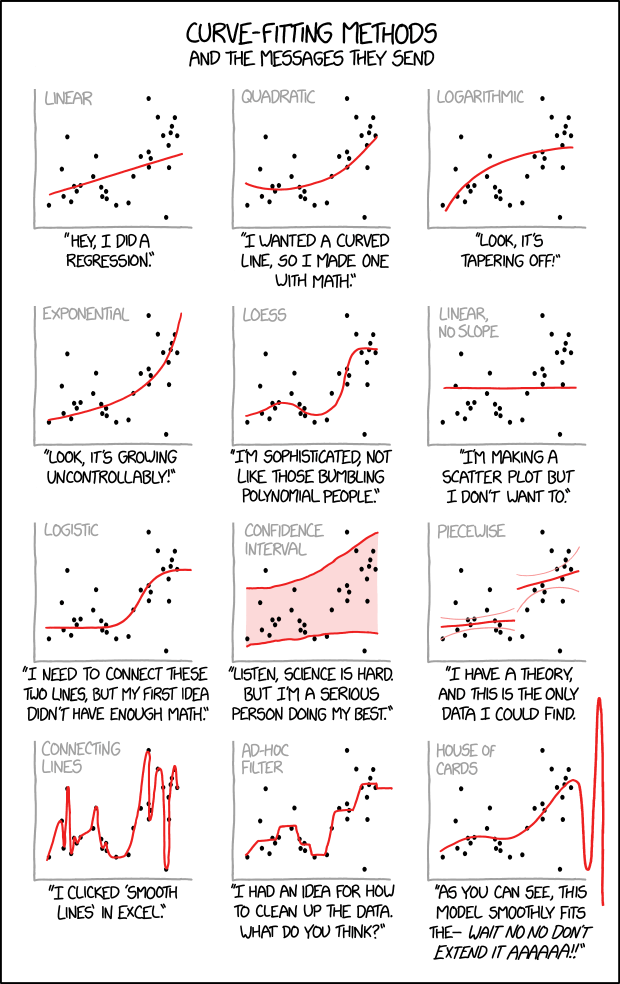
<div align='right'><a href='https://www.explainxkcd.com/wiki/index.php/2048:_Curve-Fitting'>Source</a></div>


As such, the Anscombe's quartet is a perfect case-study on why a single metric should not be relied upon in data analysis __without__ a visual inspection of the dataset. An extension of Anscombe's work is The Datasaurus Dozen ([1](https://www.autodeskresearch.com/publications/samestats) and [2](https://doi.org/10.1145/3025453.3025912), where each dataset can be summarized similarly with respect to their mean, standard deviation, and Pearson's correlation.

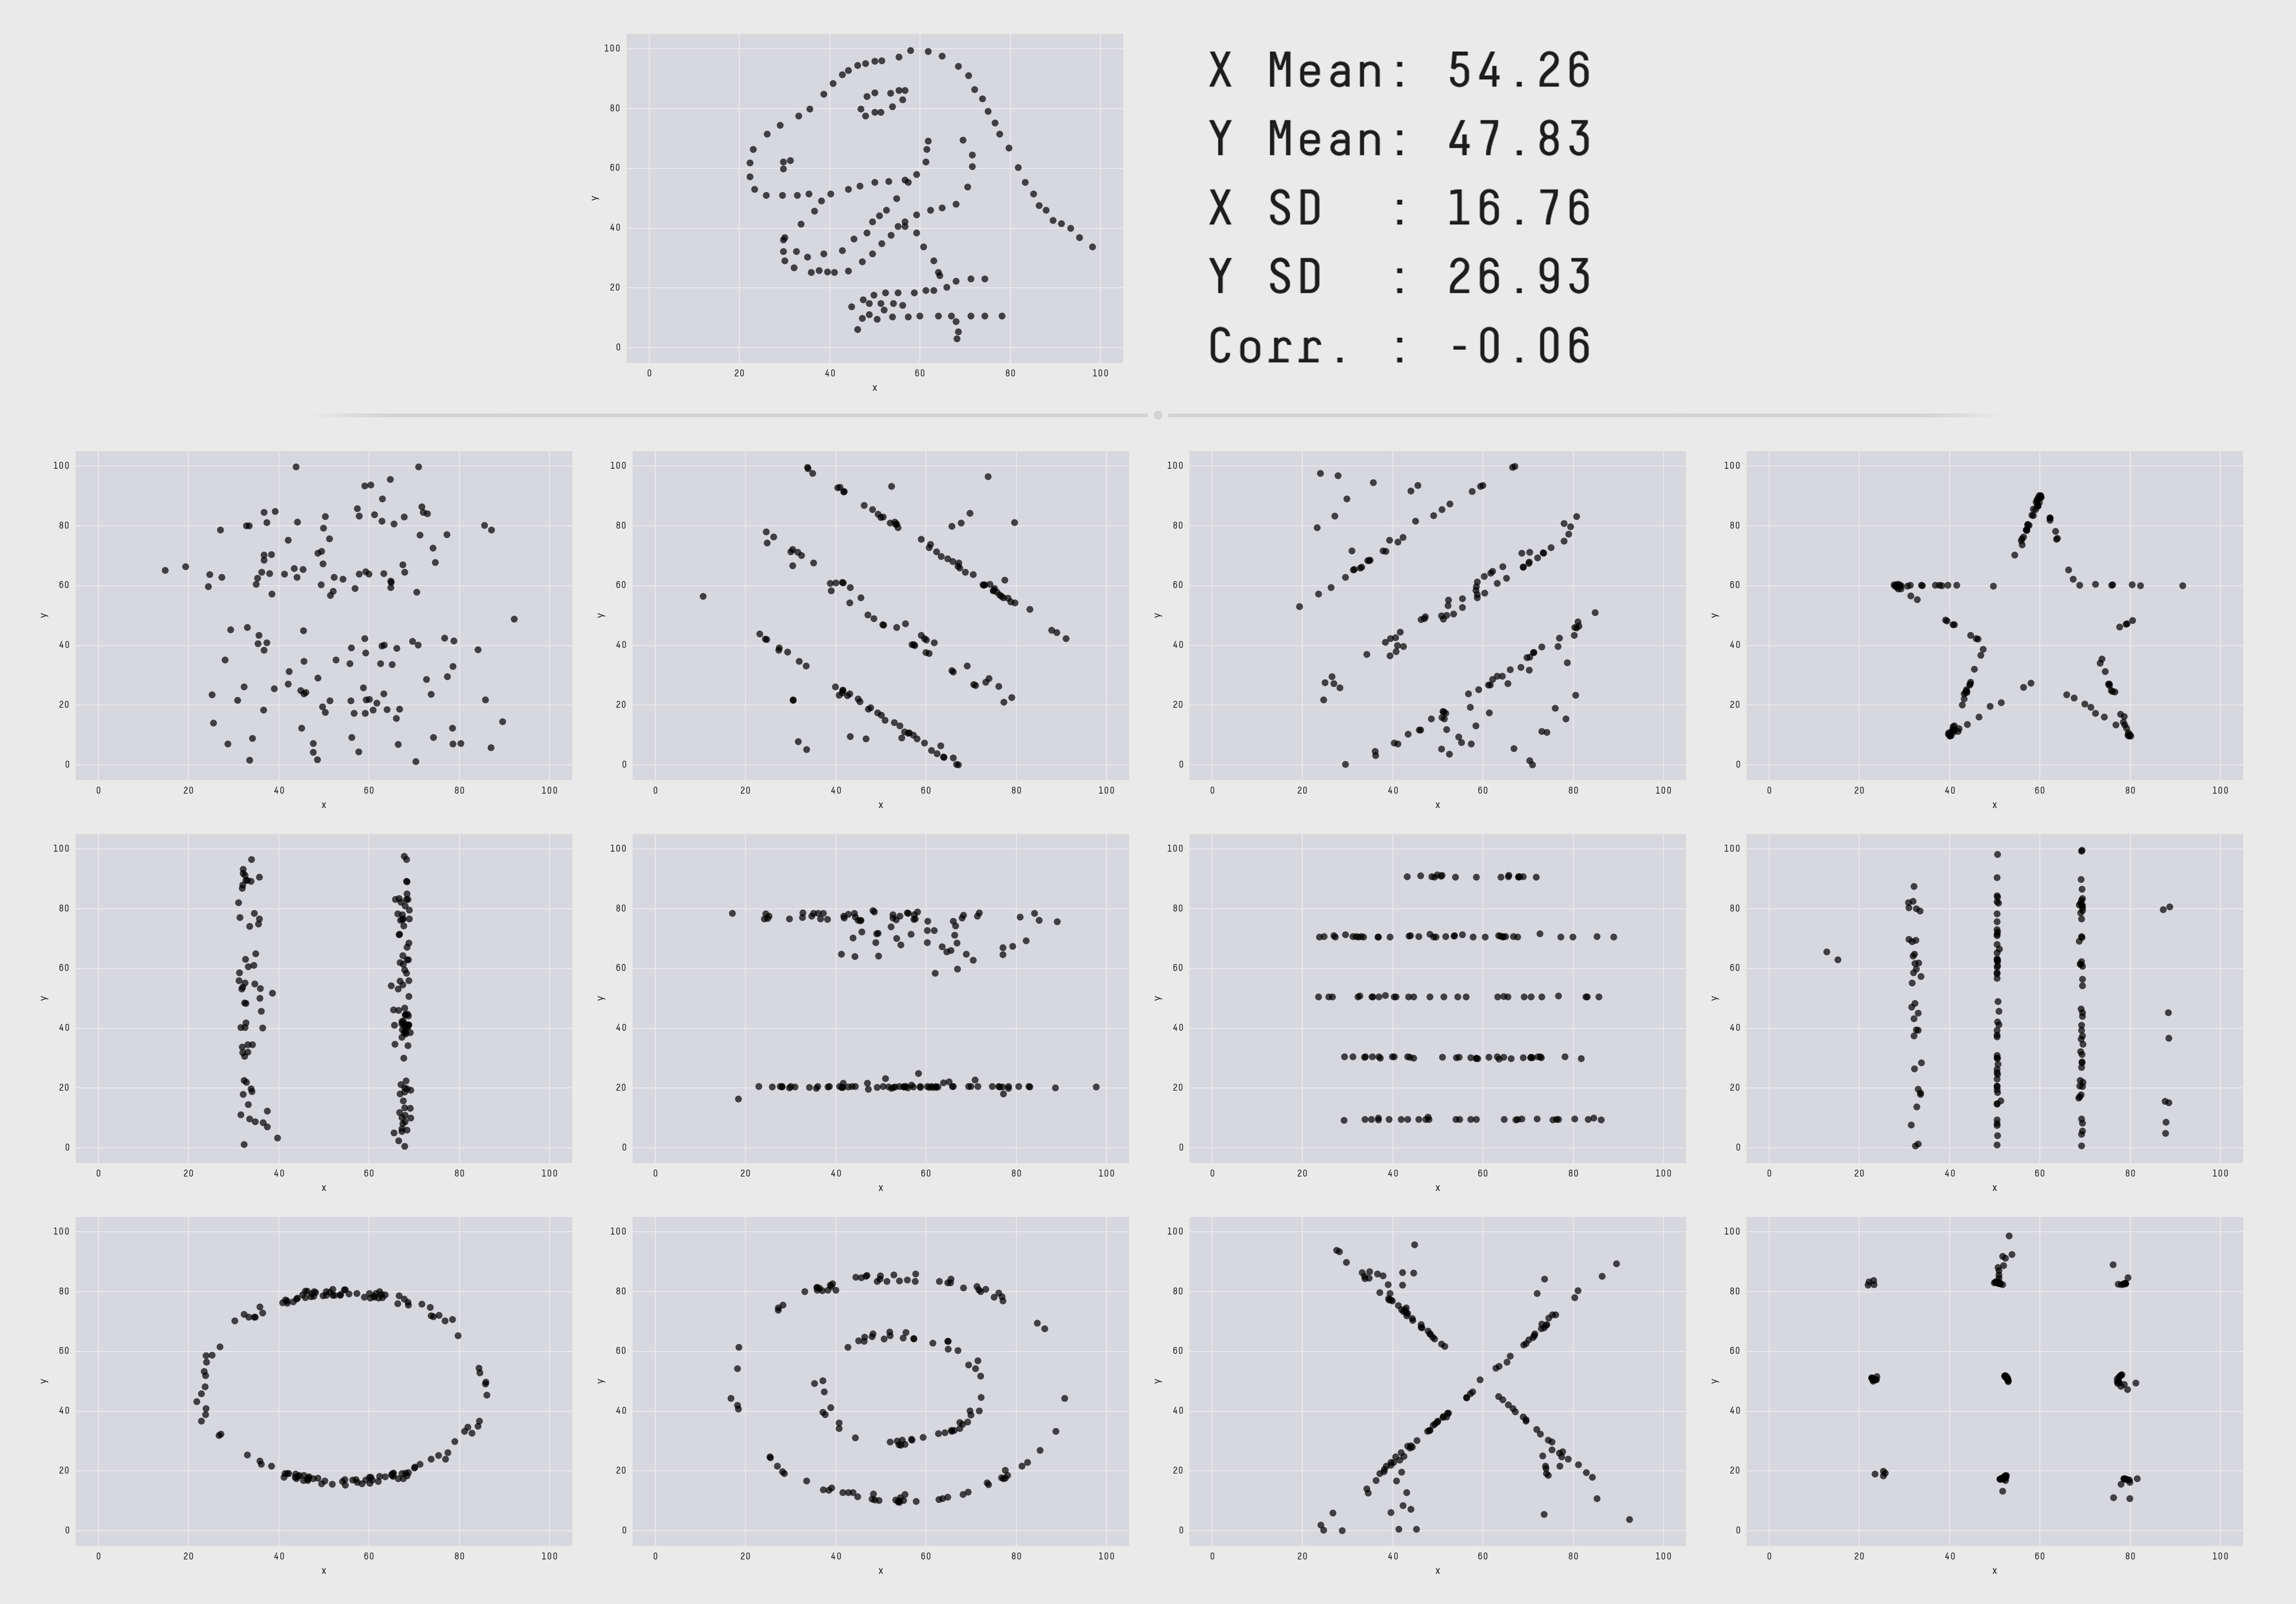


Interestingly, the method by which Anscombe created his dataset is not known but very likely by trial and error (see  [Govindaraju & Haslett, 2008](https://doi.org/10.1080/00207390701753788)). A few attempts to replicate Anscombe's work include:
1. [Chatterjee & Firat (2007)](https://doi.org/10.1198/000313007X220057) - used a genetic algorithm-based approach, although the replicate dataset do not match Anscombe's dataset perfectly.
1. [Govindaraju & Haslett (2008)](https://doi.org/10.1080/00207390701753788) - multiple iterations of simple linear regression approaching convergence, also not a perfect match.
1. [Matejka & Fitzmaurice](https://doi.org/10.1145/3025453.3025912) - simulated annealing method agnostic to the target statistical properties.


***
## <a name='exploratoryDA'></a> Exploratory data analysis

Exploratory data analysis (EDA) is often used by data scientists to understand the structure of a particular dataset. No special calculations are performed, as the objective is to use as many straightforward, nonparametric descriptors as possible. In many instances, these include boxplots, scatter plots and distribution analysis.

EDA is a powerful technique that allows data scientists to focus their efforts towards a goal, *e.g.* predictive modeling, by deploying the available algorithms targeted towards their dataset. For instance, if nonlinear relationships among the variables are apparent from the EDA, the applicability of linear regression is then questionable.

In this notebook, various plots will be created using Python libraries to visually analyse the Anscombe's dataset, following by the calculation of their descriptive statistics. Before starting, however, these libraries will have to be imported first.

In [1]:
# although we can read csv files with numpy, pandas is much better for data analytics
import pandas as pd
import numpy as np

# to make interactive plots with plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import plotly.figure_factory as ff
from plotly import tools

# for linear and quadratic regressions
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# for calculating BIC and AIC
import pypunisher as punisher

# read in our dataset
filename = 'anscombe.csv'

df = pd.read_csv(filename)
df

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


When we use the `read_csv()` function out-of-the-box by passing just the filename, pandas can automatically guess the header row and separator in the csv file as indicated by the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

Despite this table looking reasonably good, a much better presentable form can be obtained. First, the 'Unnamed' column should be used as the index, and the four datasets in the quartet presented in pairs whereby the column 'x1' is next to 'y1' and so on.

In [2]:
df = pd.read_csv(filename, index_col=0)
df = df[['x1','y1', 'x2','y2', 'x3', 'y3', 'x4', 'y4']]
df

,x1,y1,x2,y2,x3,y3,x4,y4
1,10,8.04,10,9.14,10,7.46,8,6.58
2,8,6.95,8,8.14,8,6.77,8,5.76
3,13,7.58,13,8.74,13,12.74,8,7.71
4,9,8.81,9,8.77,9,7.11,8,8.84
5,11,8.33,11,9.26,11,7.81,8,8.47
6,14,9.96,14,8.10,14,8.84,8,7.04
7,6,7.24,6,6.13,6,6.08,8,5.25
8,4,4.26,4,3.10,4,5.39,19,12.50
9,12,10.84,12,9.13,12,8.15,8,5.56
10,7,4.82,7,7.26,7,6.42,8,7.91


The table above now is better organized than the one before, but still looks too plain. Although the Pandas library does allow [styling of tables](https://pandas.pydata.org/pandas-docs/stable/style.html), it is easier to be performed using the Plotly library.

In [3]:
# reference: https://plot.ly/python/table/

trace = go.Table(
    header=dict(values=list(df.columns),
                fill = dict(color='blue'),
                align = ['center'],
                font = dict(color = 'white')
               ),

    cells=dict(values=[df.x1, df.y1,
                       df.x2, df.y2,
                       df.x3, df.y3,
                       df.x4, df.y4],
               fill = dict(color=['red', 'red', 'yellow', 'yellow', 'lightgreen', 'lightgreen', 'black', 'black']),
               align = ['center'],
               font = dict(color=['white', 'white', 'black', 'black', 'black', 'black', 'white', 'white'])
              )
               )

data = [trace] 
iplot(data)

The values in the columns can also be ordered so that a sensible conclusion can be made by looking at the table itself.

In [4]:
# reorder the table above
# first, split the df because we need to do some separate operations, plotting, regression etc.
# lastly, we need to reset the indices to make it easier for remerging etc.

df_Q1 = df[['x1', 'y1']]
df_Q1 = df_Q1.sort_values('x1')
df_Q1 = df_Q1.reset_index(drop=True)

df_Q2 = df[['x2', 'y2']]
df_Q2 = df_Q2.sort_values('x2')
df_Q2 = df_Q2.reset_index(drop=True)

df_Q3 = df[['x3', 'y3']]
df_Q3 = df_Q3.sort_values('x3')
df_Q3 = df_Q3.reset_index(drop=True)

df_Q4 = df[['x4', 'y4']]
df_Q4 = df_Q4.sort_values('x4')
df_Q4 = df_Q4.reset_index(drop=True)

# because the plotly table header can only take 1 argument, we need to join the dataframes back again
# ref: https://pandas.pydata.org/pandas-docs/stable/merging.html
df = pd.concat([df_Q1, df_Q2, df_Q3, df_Q4], axis=1)

In [5]:
trace = go.Table(
    header=dict(values=list(df.columns),
                fill = dict(color='blue'),
                align = ['center'],
                font = dict(color = 'white')
               ),

    cells=dict(values=[df.x1, df.y1,
                       df.x2, df.y2,
                       df.x3, df.y3,
                       df.x4, df.y4],
               fill = dict(color=['red', 'red', 'yellow', 'yellow', 'lightgreen', 'lightgreen', 'black', 'black']),
               align = ['center'],
               font = dict(color=['white', 'white', 'black', 'black', 'black', 'black', 'white', 'white'])
              )
               )

data = [trace] 
iplot(data)

The table above easily shows to us that:

1. Dataset I - there is an almost linear increase in *y* as *x* increases but with dips at a minimum of 2 points (roughly)
1. Dataset II - *y* increases as *x* increases and then decreases again, suggesting a quadratic relationship
1. Dataset III - *y* increases as *x* increases but there is an outlier in *y* (12.74)
1. Dataset IV is a bit problematic because the same value of *x* is associated with multiple *y* values, and there seems to be an outlier *x* (19)

Of course, because we as humans are better with visuals, we will create interactive plots* of these datasets using Plotly.

*<i>Interactivity means the end-user can zoom in/out, change scales and even edit the plots with Plotly Chart Studio (a free tool).</i>

A classical method to look at simple datasets where there are only two variables is a scatterplot.

In [6]:
# https://plot.ly/python/subplots/#customizing-subplot-axes

trace1 = go.Scatter(x=df_Q1['x1'], y=df_Q1['y1'], mode='lines+markers', name = 'Dataset 1: lines')
trace1_spline = go.Scatter(
                  x=df_Q1['x1'],
                  y=df_Q1['y1'],
                  mode='lines',
                  line=dict(shape='spline'),
                  name='Quartet 1: spline'
                  )

# spline for Q2 will just be like the lines anyway
trace2 = go.Scatter(x=df_Q2['x2'], y=df_Q2['y2'], mode='lines+markers', name = 'Dataset 2: lines')

trace3 = go.Scatter(x=df_Q3['x3'], y=df_Q3['y3'], mode='lines+markers')
trace3_spline = go.Scatter(
                  x=df_Q3['x3'],
                  y=df_Q3['y3'],
                  mode='lines',
                  line=dict(shape='spline'),
                  name='Dataset 3: spline'
                  )

trace4 = go.Scatter(x=df_Q4['x4'], y=df_Q4['y4'], mode='lines+markers', name = 'Dataset 4: lines')
trace4_spline = go.Scatter(
                  x=df_Q4['x4'],
                  y=df_Q4['y4'],
                  mode='lines',
                  line=dict(shape='spline'),
                  name='Quartet 4: spline'
                  )

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Quartet 1', 'Quartet 2',
                                                          'Quartet 3', 'Quartet 4'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace1_spline, 1, 1)

fig.append_trace(trace2, 1, 2)

fig.append_trace(trace3, 2, 1)
fig.append_trace(trace3_spline, 2, 1)

fig.append_trace(trace4, 2, 2)
fig.append_trace(trace4_spline, 2, 2)

fig['layout']['xaxis1'].update(title='x1')
fig['layout']['xaxis2'].update(title='x2')
fig['layout']['xaxis3'].update(title='x3')
fig['layout']['xaxis4'].update(title='x4')

fig['layout']['yaxis1'].update(title='y1')
fig['layout']['yaxis2'].update(title='y2')
fig['layout']['yaxis3'].update(title='y3')
fig['layout']['yaxis4'].update(title='y4')

fig['layout'].update(title="Anscombe's quartet")

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



Now we can see these quartets visually that confirms our table assessment. Let's see what happens if we fit a linear regression line.

In [7]:
# ref: https://plot.ly/scikit-learn/plot-ols/

# Quartet 1
Q1_X = df_Q1['x1'].iloc[:].values
Q1_X = Q1_X.reshape(-1,1) # we have to reshape because the fit() function expects a 2D array
Q1_Y = df_Q1['y1'].iloc[:].values

# Quartet 2
Q2_X = df_Q2['x2'].iloc[:].values
Q2_X = Q2_X.reshape(-1,1) 
Q2_Y = df_Q2['y2'].iloc[:].values

# Quartet 3
Q3_X = df_Q3['x3'].iloc[:].values
Q3_X = Q3_X.reshape(-1,1)
Q3_Y = df_Q3['y3'].iloc[:].values

# Quartet 4
Q4_X = df_Q4['x4'].iloc[:].values
Q4_X = Q4_X.reshape(-1,1)
Q4_Y = df_Q4['y4'].iloc[:].values

# variable to instantiate and hold the LinearRegression object
regr = linear_model.LinearRegression()

# let's fit linear lines to the X/Y in each quartet separately
# this is actually similar to numpy polyfit function
# ref: https://stackoverflow.com/questions/32660231/how-to-fit-a-polynomial-curve-to-data-using-scikit-learn
regr_Q1 = regr.fit(Q1_X, Q1_Y)
regr_Q2 = regr.fit(Q2_X, Q2_Y)
regr_Q3 = regr.fit(Q3_X, Q3_Y)
regr_Q4 = regr.fit(Q4_X, Q4_Y)

# predicted Y values
Q1_Y_pred = regr_Q1.predict(Q1_X)
Q2_Y_pred = regr_Q2.predict(Q2_X)
Q3_Y_pred = regr_Q3.predict(Q3_X)
Q4_Y_pred = regr_Q4.predict(Q4_X)

(regr_Q1.coef_, regr_Q2.coef_, regr_Q3.coef_, regr_Q4.coef_, 
 regr_Q1.intercept_, regr_Q2.intercept_, regr_Q3.intercept_, regr_Q4.intercept_)

(array([0.49990909]),
 array([0.49990909]),
 array([0.49990909]),
 array([0.49990909]),
 3.0017272727272726,
 3.0017272727272726,
 3.0017272727272726,
 3.0017272727272726)

The values above seem to be imply that the lines are all the same.

In [8]:
print('Mean Absolute Error Q1:', metrics.mean_absolute_error(Q1_Y, Q1_Y_pred))  
print('Mean Squared Error Q1:', metrics.mean_squared_error(Q1_Y, Q1_Y_pred))  
print('Root Mean Squared Error Q1:', np.sqrt(metrics.mean_squared_error(Q1_Y, Q1_Y_pred)))
print('R^2 (coefficient of determination) Q1:', metrics.r2_score(Q1_Y, Q1_Y_pred))
print('---')

print('Mean Absolute Error Q2:', metrics.mean_absolute_error(Q2_Y, Q2_Y_pred))
print('Mean Squared Error Q2:', metrics.mean_squared_error(Q2_Y, Q2_Y_pred))
print('Root Mean Squared Error Q2:', np.sqrt(metrics.mean_squared_error(Q2_Y, Q2_Y_pred)))
print('R^2 (coefficient of determination) Q2:', metrics.r2_score(Q2_Y, Q2_Y_pred))
print('---')

print('Mean Absolute Error Q3:', metrics.mean_absolute_error(Q3_Y, Q3_Y_pred))
print('Mean Squared Error Q3:', metrics.mean_squared_error(Q3_Y, Q3_Y_pred))  
print('Root Mean Squared Error Q3:', np.sqrt(metrics.mean_squared_error(Q3_Y, Q3_Y_pred)))
print('R^2 (coefficient of determination) Q3:', metrics.r2_score(Q3_Y, Q3_Y_pred))
print('---')

print('Mean Absolute Error Q4:', metrics.mean_absolute_error(Q4_Y, Q4_Y_pred))
print('Mean Squared Error Q4:', metrics.mean_squared_error(Q4_Y, Q4_Y_pred))  
print('Root Mean Squared Error Q4:', np.sqrt(metrics.mean_squared_error(Q4_Y, Q4_Y_pred)))
print('R^2 (coefficient of determination) Q4:', metrics.r2_score(Q4_Y, Q4_Y_pred))

Mean Absolute Error Q1: 0.8373057851239668
Mean Squared Error Q1: 1.2511539669421492
Root Mean Squared Error Q1: 1.1185499394046514
R^2 (coefficient of determination) Q1: 0.6665423714029703
---
Mean Absolute Error Q2: 0.9679338842975208
Mean Squared Error Q2: 1.2523901652892564
Root Mean Squared Error Q2: 1.1191023926742611
R^2 (coefficient of determination) Q2: 0.6662420117029544
---
Mean Absolute Error Q3: 0.7164793388429751
Mean Squared Error Q3: 1.250564049586776
Root Mean Squared Error Q3: 1.1182862109436815
R^2 (coefficient of determination) Q3: 0.6663237323484936
---
Mean Absolute Error Q4: 0.9027272727272728
Mean Squared Error Q4: 1.249317272727273
Root Mean Squared Error Q4: 1.1177286221293936
R^2 (coefficient of determination) Q4: 0.6667072568984653


Seems all the metrices are almost the same, which doesn't tell us anything. Let's now check the fits visually

In [9]:
# do the linear fit lines

# https://plot.ly/python/subplots/#customizing-subplot-axes

trace1 = go.Scatter(x=df_Q1['x1'], y=df_Q1['y1'], mode='markers')
trace1_linReg = go.Scatter(x=df_Q1['x1'], y = Q1_Y_pred)

trace2 = go.Scatter(x=df_Q2['x2'], y=df_Q2['y2'], mode='markers')
trace2_linReg = go.Scatter(x=df_Q2['x2'], y = Q2_Y_pred)

trace3 = go.Scatter(x=df_Q3['x3'], y=df_Q3['y3'], mode='markers')
trace3_linReg = go.Scatter(x=df_Q3['x3'], y = Q3_Y_pred)

trace4 = go.Scatter(x=df_Q4['x4'], y=df_Q4['y4'], mode='markers')
trace4_linReg = go.Scatter(x=df_Q4['x4'], y = Q4_Y_pred)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Quartet 1', 'Quartet 2',
                                                          'Quartet 3', 'Quartet 4'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace1_linReg, 1, 1)

fig.append_trace(trace2, 1, 2)
fig.append_trace(trace2_linReg, 1, 2)

fig.append_trace(trace3, 2, 1)
fig.append_trace(trace3_linReg, 2, 1)

fig.append_trace(trace4, 2, 2)
fig.append_trace(trace4_linReg, 2, 2)

fig['layout']['xaxis1'].update(title='x1')
fig['layout']['xaxis2'].update(title='x2')
fig['layout']['xaxis3'].update(title='x3')
fig['layout']['xaxis4'].update(title='x4')

fig['layout']['yaxis1'].update(title='y1')
fig['layout']['yaxis2'].update(title='y2')
fig['layout']['yaxis3'].update(title='y3')
fig['layout']['yaxis4'].update(title='y4')

fig['layout'].update(title="Anscombe's quartet")

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



Indeed, despite the presence of outliers has distorted the fit such that a linear fit looks deceivingly acceptable for all these cases. In reality, linear fit is only suitable for Quartet 1 and (a bit less) for Quartet 3. Quartet 2 is best modeled by a quadratic fit.

We will do a few things further:

1. check residual plot for Quartet 1
1. Confirm that a quadratic fit for Quartet 2 is much better than a linear fit and then check the residual plot (use pypunisher code: (punisher.metrics.criterion.aic(regr_Q1, Q1_X, Q1_Y), punisher.metrics.criterion.bic(regr_Q1, Q1_X, Q1_Y)) to compare linear vs. quad.
1. Do a formal outlier removal for Quartet 3 and 4

### Visual check of Quartet 1 linear fit by residual plot

In [10]:
# calculate the residuals
Q1_residual = Q1_Y_pred - Q1_Y

data = [go.Scatter(x=Q1_Y_pred, y = Q1_residual, mode='markers')]

layout= go.Layout(
    title= 'Quartet 1 Residual plot for linear fit'
)

fig = go.Figure(data=data, layout=layout)



iplot(fig)

The residual plot above shows no apparent structure and the values are scattered above and below 0 randomly, which means the linear fit is good.

### Quartet 2 linear vs. quadratic fits

In [11]:
# https://stackoverflow.com/questions/33710829/linear-regression-with-quadratic-terms
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

quadratic_model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
regr_Q2_quad = quadratic_model.fit(Q2_X, Q2_Y)
Q2_Y_predQuadratic = regr_Q2_quad.predict(Q2_X)

trace1 = go.Scatter(x=df_Q2['x2'], y=df_Q2['y2'],
                    mode='markers', name = 'Quartet 2', marker = dict(color = 'black'))

trace1_linReg = go.Scatter(x=df_Q2['x2'], y = Q2_Y_pred,
                           name = 'Quartet 2 - linear fit',
                           mode = 'lines',
                           line = dict(color = 'blue', width= 3)
                          )
trace1_quadReg = go.Scatter(x=df_Q2['x2'], y = Q2_Y_predQuadratic,
                            name = 'Quartet 2 - quadratic fit',
                            mode = 'lines',
                            line = dict(color = 'lightgreen', width = 3)
                           )

data = [trace1, trace1_linReg, trace1_quadReg]

layout= go.Layout(
    title= 'Quartet 2 linear and quadratic fits'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Obviously, the quadratic fit is significantly better than linear fit. Let's compare the stats.

In [12]:
print('Mean Absolute Error Q2:', metrics.mean_absolute_error(Q2_Y, Q2_Y_pred))  
print('Mean Squared Error Q2:', metrics.mean_squared_error(Q2_Y, Q2_Y_pred))  
print('Root Mean Squared Error Q2:', np.sqrt(metrics.mean_squared_error(Q2_Y, Q2_Y_pred)))
print('R^2 (coefficient of determination) Q2:', metrics.r2_score(Q2_Y, Q2_Y_pred))
print('---')
print('Mean Absolute Error Q2 quadratic:', metrics.mean_absolute_error(Q2_Y, Q2_Y_predQuadratic))  
print('Mean Squared Error Q2 quadratic:', metrics.mean_squared_error(Q2_Y, Q2_Y_predQuadratic))  
print('Root Mean Squared Error Q2 quadratic:', np.sqrt(metrics.mean_squared_error(Q2_Y, Q2_Y_predQuadratic)))
print('R^2 (coefficient of determination) Q2 quadratic:', metrics.r2_score(Q2_Y, Q2_Y_predQuadratic))


Mean Absolute Error Q2: 0.9679338842975208
Mean Squared Error Q2: 1.2523901652892564
Root Mean Squared Error Q2: 1.1191023926742611
R^2 (coefficient of determination) Q2: 0.6662420117029544
---
Mean Absolute Error Q2 quadratic: 0.0012205975842368407
Mean Squared Error Q2 quadratic: 2.0343293070577633e-06
Root Mean Squared Error Q2 quadratic: 0.0014262991646417534
R^2 (coefficient of determination) Q2 quadratic: 0.999999457857722


The problem with using R^2 is that it works only for linear regression due to the formula, plus it doesn't take into account that a model with more parameters will obviously fit the data better. Therefore, we have to penalize the more complicated model and see if it is still better. We can do this by calculating BIC and AIC.

In [13]:
print('linear: ', punisher.metrics.criterion.aic(regr_Q2, Q2_X, Q2_Y), punisher.metrics.criterion.bic(regr_Q2, Q2_X, Q2_Y))

print('quadratic: ', punisher.metrics.criterion.aic(regr_Q2_quad, Q2_X, Q2_Y),
      punisher.metrics.criterion.bic(regr_Q2_quad, Q2_X, Q2_Y))

linear:  36.13668461017363 36.09013543852756
quadratic:  -110.49769591962843 -110.5442450912745


The negative BIC and AIC clearly show that the quadratic fit is the best one.

In [14]:
# residuals

# calculate the residuals
Q2_residual = Q2_Y_pred - Q2_Y
Q2_residualQuad = Q2_Y_predQuadratic - Q2_Y

trace1 = go.Scatter(x=Q2_Y_pred, y = Q2_residual, mode = 'markers', name = 'Quartet 2 - linear fit')
trace2 = go.Scatter(x=Q2_Y_predQuadratic, y = Q2_residualQuad, mode = 'markers', name = 'Quartet 2 - quadratic fit')

data = [trace1, trace2]

layout= go.Layout(
    title= 'Residual plots for Quartet 2 linear and quadratic fits'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

And the residuals for quadratic fit has no structure, unlike that for linear fit. Therefore, the quadratic fit is better.

### Quartet 3 - outlier
We can use boxplot and violin plot to identify potential outliers.


In [15]:
#https://plot.ly/python/box-plots/

boxQ1 = go.Box(
    y=df_Q1['y1'],
    name = 'Quartet 1',
    boxpoints = 'all',
    boxmean = 'sd'
)

boxQ2 = go.Box(
    y=df_Q2['y2'],
    name = 'Quartet 2',
    boxpoints = 'all',
    boxmean = 'sd'
)

boxQ3 = go.Box(
    y=df_Q3['y3'],
    name = 'Quartet 3',
    boxpoints = 'all',
    boxmean = 'sd'
)

boxQ4= go.Box(
    y=df_Q4['y4'],
    name = 'Quartet 4',
    boxpoints = 'all',
    boxmean = 'sd'
)

data = [boxQ1, boxQ2, boxQ3, boxQ4]
iplot(data)

In [16]:
# https://plot.ly/python/violin/#reference

violinQ1 = go.Violin(y = df_Q1['y1'],
                   name = 'Quartet 1',
                   box = dict(visible=True),
                   meanline = dict(visible=True)
                    )

violinQ2 = go.Violin(y = df_Q2['y2'],
                   name = 'Quartet 2',
                   box = dict(visible=True),
                   meanline = dict(visible=True)
                   )

violinQ3 = go.Violin(y = df_Q3['y3'],
                   name = 'Quartet 3',
                   box = dict(visible=True),
                   meanline = dict(visible=True)
                   )

violinQ4 = go.Violin(y = df_Q4['y4'],
                   name = 'Quartet 4',
                   box = dict(visible=True),
                   meanline = dict(visible=True)
                   )

data = [violinQ1, violinQ2, violinQ3, violinQ4]

layout = go.Layout(title = 'Violin plots of the individual quartet')

fig = go.Figure(data = data, layout=layout)
iplot(fig)

The fact that these quartets have one outlier is quite evident compared to Q1 and Q2.

***
## Descriptive statistics
3. Calculate the descriptive statistics of the variables in the dataset.

In [17]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


## Discussion
4. Explain why the dataset is interesting, referring to the plots and statistics above.


## Conclusion

links:
https://en.wikipedia.org/wiki/Anscombe%27s_quartet